In [2]:
#other useful packages
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import IBMQ

# Import Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import random
from qiskit.circuit.measure import measure
# provider = IBMQ.load_account()
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.fake_provider import FakeVigo


In [14]:
def single_bell(random_a, random_b):
    keyA = ''
    keyB = ''
    bell_init_state = []
    bell_measure_result = []
    correct_num = 0
    error_num = 0
    l_i=[]
    length = len(random_a)
    # device_backend = FakeVigo()
    backend = AerSimulator.from_backend(FakeVigo())
    # backend = provider.get_backend('ibmq_manila')
    # backend = provider.get_backend('ibmq_qasm_simulator')
    # backend = Aer.get_backend('qasm_simulator')
    for i in range(length):
        qreg = QuantumRegister(2)
        creg = ClassicalRegister(4)
        qc = QuantumCircuit(qreg, creg)
        make_bell_random = random.randint(0, 3)
        bell_init_state.append(make_bell_random)
        # print("选择bell态随机数:", make_bell_random)
        if make_bell_random == 0:
            qc.h(0)
            qc.cx(0, 1)
            # print("bell量子状态初始态: ( |00>+|11> )/√2")
        if make_bell_random == 1:
            qc.x(1)
            qc.h(0)
            qc.cx(0, 1)
            # print("bell量子状态初始态: ( |01>+|10> )/√2")
        if make_bell_random == 2:
            qc.x(0)
            qc.h(0)
            qc.cx(0, 1)
            # print("bell量子状态初始态: ( |00>-|11> )/√2")
        if make_bell_random == 3:
            qc.x(0)
            qc.x(1)
            qc.h(0)
            qc.cx(0, 1)
            # print("bell量子状态初始态: ( |01>-|10> )/√2")
        random_userA = random_a[i]
        random_userB = random_b[i]

        '''
        根据随机数选择是否单粒子测量
        '''
        if random_userA:
            qc.measure(qreg[0], creg[0])
            qc.x(qreg[0])
        if random_userB:
            qc.measure(qreg[1], creg[1])
            qc.x(qreg[1])

        #联合测量
        qc.measure(qreg[0], creg[2])
        qc.measure(qreg[1], creg[3])
        #保存图片
        qc.draw(output='mpl', filename="E:\桌面\Bell_pic\\"+str(i)+".jpg")
        job = execute(qc, backend=backend, shots=1)
        results = list(job.result().get_counts().keys())[0]
        #单粒子测量结果
        measure_A = results[3]
        measure_B = results[2]
        #联合测量结果
        measure_resultAB = results[0]+results[1]

        '''
        当两个用户随机数都为1时,生成密钥,这里约定为A的测量结果
        '''

        if random_userA and random_userB:
            keyA += measure_A
            if make_bell_random == 0 or make_bell_random == 2:
                keyB += measure_B
                if measure_A!=measure_B:
                    l_i.append(i)
            else:
                keyB += str((int(measure_B)+1) % 2)
                if measure_A!=str((int(measure_B)+1) % 2):
                    l_i.append(i)
            
        '''
        将联合测量结果转为对应的Bell态
        '''
        if make_bell_random == 0 or make_bell_random == 1:
            if measure_resultAB == '00' or measure_resultAB == '11':
                bell_measure_result.append(0)
            else:
                bell_measure_result.append(1)
        if make_bell_random == 2 or make_bell_random == 3:
            if measure_resultAB == '00' or measure_resultAB == '11':
                bell_measure_result.append(2)
            else:
                bell_measure_result.append(3)
        '''
        通过A,B用户随机数,Bell初始值,Bell联合测量值
        来计算正确的数量及错误数量
        判断是否发送错误
        '''
        if (random_userA == 0 and random_userB == 0) or (random_userA == 1 and random_userB == 1):
            if bell_measure_result[i] == make_bell_random:

                correct_num = correct_num+1
            else:
                error_num = error_num+1

        else:
            if make_bell_random == 0 or make_bell_random == 1:
                if make_bell_random ^ bell_measure_result[i]:
                    correct_num = correct_num+1
                else:
                    error_num = error_num+1
            else:
                if (make_bell_random-2) == 0 or (make_bell_random-2) == 1:
                    correct_num = correct_num+1
                else:
                    error_num = error_num+1
    #保存错误率计算结果图
    plt.title("Error rate")
    x = [correct_num, error_num]
    plt.pie(x,  labels=['correct_counts', 'error_counts'], autopct='%1.1f%%')
    plt.savefig("./rate.jpg")
    print(l_i)
    return bell_init_state, keyA, keyB, bell_measure_result, correct_num, error_num

    # return bell_init_state, keyA, keyB, bell_measure_result,correct_num,error_num


用户A的随机数: [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1] 
用户B的随机数: [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1

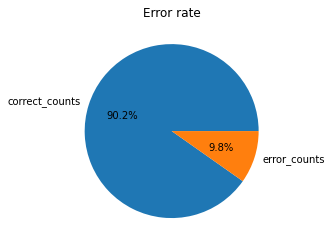

In [15]:

# list_random_a = [1,1,1,1,1]
# list_random_b = [1,1,1,1,1]
list_random_a = []
list_random_b = []
for i in range(256):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    list_random_a.append(a)
    list_random_b.append(b)
print("用户A的随机数:", list_random_a, '\n用户B的随机数:', list_random_b)
bell_init_state, keyA, keyB, bell_measure_result,cor,err= single_bell(
    list_random_a, list_random_b)
print("初始bell态选择:", bell_init_state)
print("用户A的密钥:", keyA, "\n密钥长度:", len(keyA))
print("用户B的密钥:", keyB)
print("bell态测量结果:", bell_measure_result)
print('正确测量数：',cor,'\n错误测量数:',err)

In [ ]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(10)
qc = QuantumCircuit(qreg, creg)
qc.h(0)
qc.cx(0, 1)
qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])
qc.x(0)
qc.x(1)
qc.measure(qreg[0],creg[2])
qc.measure(qreg[1],creg[3])
backend=provider.get_backend('ibm_oslo')
# backend=Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1000)
results = job.result().get_counts()
# measure_resultAB = list(results.keys())[0]
# print(measure_resultAB)
print(results)
qc.draw(output='mpl')


In [ ]:
# # a=12
# # b=21
# # a^b
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib
# plt.title("Error rate")
# x = [1, 12]
# plt.pie(x,explode=[0,0],labels=['correct counts','error count'],autopct='%1.1f%%',shadow=True)
# plt.savefig("1.jpg")
# plt.show()